<div style = "font-size: 23px"><b>
Data Science & Business Analytics Intern at The Sparks Foundation </b></div>
<br>
<div style = "font-size: 18px"><b><I>Task #2: Prediction using UnSupervised Machine Learning</b></I></div>
<br>
<div style="font-size: 18px"><b>Author : Umadevi Balasubramanian </b></div>

<b> Problem: From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. </b>


<b>1. Loading the Dataset.</b>

In [2]:
# Importing the Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Loading the dataset from the given link.

iris = datasets.load_iris()
mydata = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data Loaded Successfully.")
mydata.head()   # Display first 5 records.

Data Loaded Successfully.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<b>The above output clearly shows there are no NULL values.</b>

<b>2. Finding the optimum number of clusters for k-means classification.</b>

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


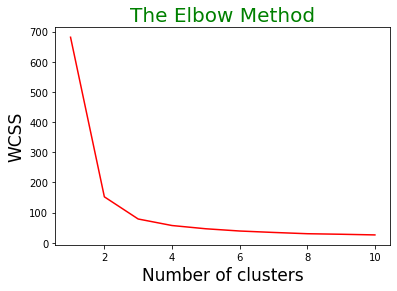

In [5]:
# Using Elbow method, no.of optimum clusters for K-Means classification is found.

x = mydata.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, color="Red")
plt.title('The Elbow Method', color="Green", size=20)
plt.xlabel('Number of clusters', size=17)
plt.ylabel('WCSS', size=17)
plt.show()


<b>Using the "elbow" as a cutoff point is a common heuristic in mathematical optimization to choose a point where 
"diminishing returns" are no longer worth the additional cost. In clustering, we choose the number of clusters so that 
adding another cluster doesn't give much better modeling of the data, the optimum number of clusters are where the "Elbow" 
occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.<br>

Hence, from the above graph we chose the optimium no.of clusters as "3" . </b>


<b>3. K-Means Clustering.</b>

In [6]:
# Applying K-Means classification to the 'iris' dataset.

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<b>4. Visualizing the Clusters. </b>

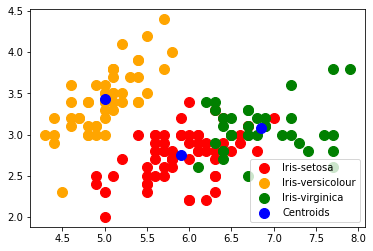

In [7]:
# Visulizing the clusters. 

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Blue', label = 'Centroids')

plt.legend()

<b> The optimum number of clusters are predicted (3 Clusters), and they are visualized using 3 different colors
(Red, Green and Orange). </b>